<a href="https://colab.research.google.com/github/megmanalo/toy_ds_project/blob/main/WiDS_Biotech_Beyond_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to the Data Science Workshop Using R**
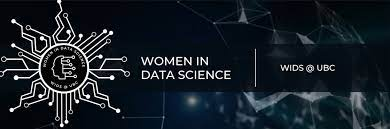
### Presented by WiDS@UBC

---




### **What is R?**



*   A programming language for statistical computing
*   Super popular language for data science, and academic research
*   UBC Classes that use R: DSCI 100, STAT 200, PSYC & BIOL Courses




---



## Part 1: Installing Packages

To use R, we will install R packages - these are a collection of tools and functions that will support us with data manipulation. We will load the packages by calling `library()`.



In [ ]:
install.packages("rsample")
library(tidyverse)
library(ggplot2)
library(dplyr)
library(rsample)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘future’, ‘furrr’, ‘slider’




### **Reading Data**

Today we will be using data on **Heart Diseases**, it's one of the most widely used datasets in medical machine learning and data science. It originates from four different sources but is commonly referred to as the Cleveland Heart Disease dataset, which is the most popular version.

To be able to use the data, first we must load it.


### **Basic R Syntax**
* `<-` is an **assignment operator**, it tells whatever is on the left is assigned the value on the right side
* Ex: `two <- 2` means the value 2 is assigned to the variable `two`
* %>% is the **pipe operator**, it allows you to use a chain of functions, and you pass the intermediate results to the next function, it's a shortcut so we can type less

To read the data, we will call the function `read_csv`

*   Inside the function, we will pass the path of our dataset

In [ ]:
# upload the heart.csv file
# read the csv file
df_heart <- read_csv("heart.csv", show_col_types = FALSE)
# preview the data
# let's only look at the first 5 rows
head(df_heart)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


## **Part 2: Data Exploration:**



1. What kind of information can we get from this dataset?
2. How big is our dataset?
3. What data types do we have?


---


1. What kind of information can we get from this dataset?

Let's look at what columns we have:

In [ ]:
colnames(df_heart)

[1] "age"      "sex"      "cp"       "trestbps" "chol"     "fbs"     
 [7] "restecg"  "thalach"  "exang"    "oldpeak"  "slope"    "ca"      
[13] "thal"     "target"

What do these variables mean?

Let's take a look at the data description here!

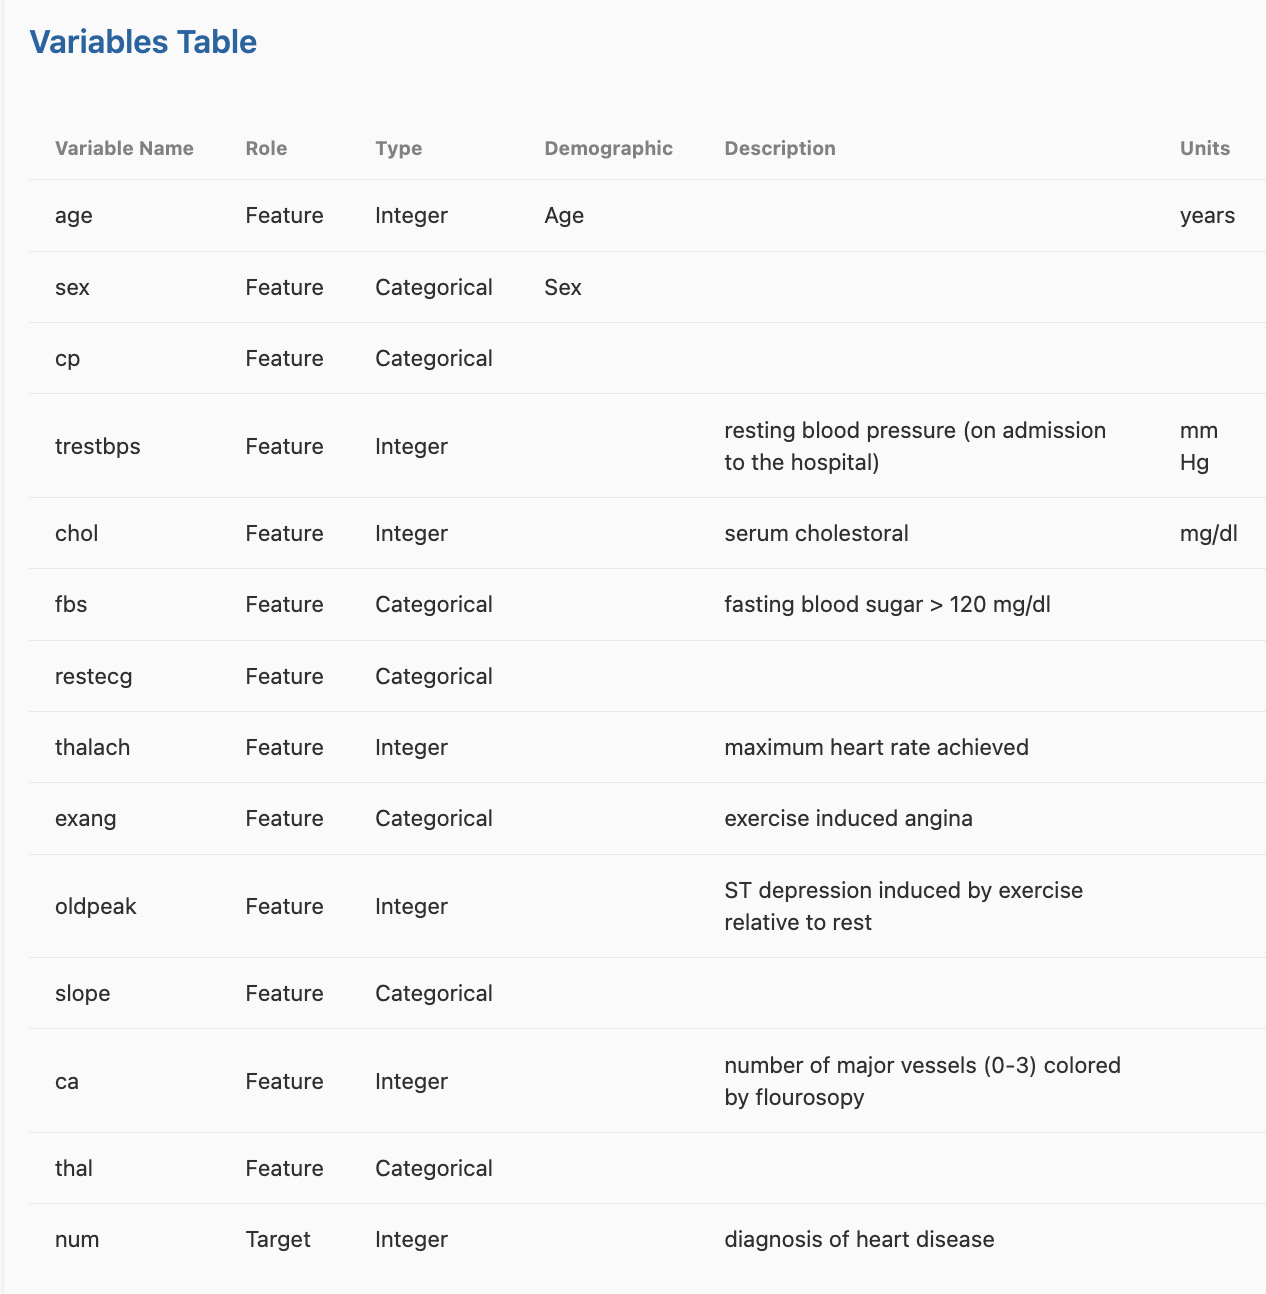


2. How big is our dataset?

In [ ]:
dim(df_heart)

[1] 1025   14

Woah, we have 1025 rows and 14 columns, that's a lot of data!

3. What data types do we have?

In [ ]:
print(sapply(df_heart, class))

      age       sex        cp  trestbps      chol       fbs   restecg   thalach 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
    exang   oldpeak     slope        ca      thal    target 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 


Looks like our entire dataset is numeric! This is a bit unusual because, based on the table above, some variables like "Sex" and "cp" appear to be categorical. However, they are currently stored as numeric values. In some cases, categorical variables like "Sex" are represented numerically—for example, Female as 1 and Male as 0.  


| **Data Type** | **Examples**      |
|---------------|-------------------|
| Character     | "hello" "dog" "1" |
| Numeric       | 0.05 123          |



---



## **Part 3: Data Manipulation**

Before we start to answer some questions with data, let's learn some R functions:

`filter()` allows us to select which rows we want

Let's look at data only from the year 2022:

In [ ]:
#filter
df_female <- filter(df_heart, sex==0)
head(df_female)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
43,0,0,132,341,1,0,136,1,3.0,1,0,3,0
34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
34,0,1,118,210,0,1,192,0,0.7,2,0,2,1


`select()` allows us to pick which columns we want to see

In [ ]:
# select
df_female_clean <- select(df_female, age, sex, trestbps, chol, thalach, exang, oldpeak, target)
head(df_female_clean)

age,sex,trestbps,chol,thalach,exang,oldpeak,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
62,0,138,294,106,0,1.9,0
58,0,100,248,122,0,1.0,1
71,0,112,149,125,0,1.6,1
43,0,132,341,136,1,3.0,0
34,0,118,210,192,0,0.7,1
34,0,118,210,192,0,0.7,1


`arrange()` allows us to sort the data by a column

Let's arrange the data by `track_popularity`

In [ ]:
# arrange in ascending order
df_female_clean <- df_female_clean %>% arrange(age)
head(df_female_clean)

# if we want to do descending, we can change the code to arrange(desc(age))

age,sex,trestbps,chol,thalach,exang,oldpeak,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
34,0,118,210,192,0,0.7,1
34,0,118,210,192,0,0.7,1
34,0,118,210,192,0,0.7,1
35,0,138,183,182,0,1.4,1
35,0,138,183,182,0,1.4,1
35,0,138,183,182,0,1.4,1


`slice()` allows to view certain data rows

Let's look at the top 10 songs

In [ ]:
# view top 10 rows
df_female_10 <- slice(df_female_clean, 1:10)
df_female_10

age,sex,trestbps,chol,thalach,exang,oldpeak,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
34,0,118,210,192,0,0.7,1
34,0,118,210,192,0,0.7,1
34,0,118,210,192,0,0.7,1
35,0,138,183,182,0,1.4,1
35,0,138,183,182,0,1.4,1
35,0,138,183,182,0,1.4,1
35,0,138,183,182,0,1.4,1
37,0,120,215,170,0,0.0,1
37,0,120,215,170,0,0.0,1


## Your turn!

Question: How many females in the dataset, aged between 30 and 40, have been diagnosed with heart disease?

Return only the columns: age and target

Use the starter code and fill in the *blanks*

In [ ]:
df_filtered <- df_heart %>%
            _____(___ == 0) %>%
            _____(age __ ___) %>%
            _____(age __ ___)  %>%
            _____(target __ ___) %>%
            _____(__, ___)
df_filtered

In [ ]:
# @title Data Filtering Solution

df_filtered <- df_heart %>%
            filter(sex == 0) %>%
            filter(age >= 30) %>%
            filter(age <= 40)  %>%
            filter(target == 1) %>%
            select(age, target)
df_filtered

## **Part 4: Data Visulization**

What factors contribute to heart disease? How old are the individuals in our dataset? Is there a relationship between `age` and `thalach`? Let's find out!

We will start by taking a look at the relationship of age and maximum heart rate!

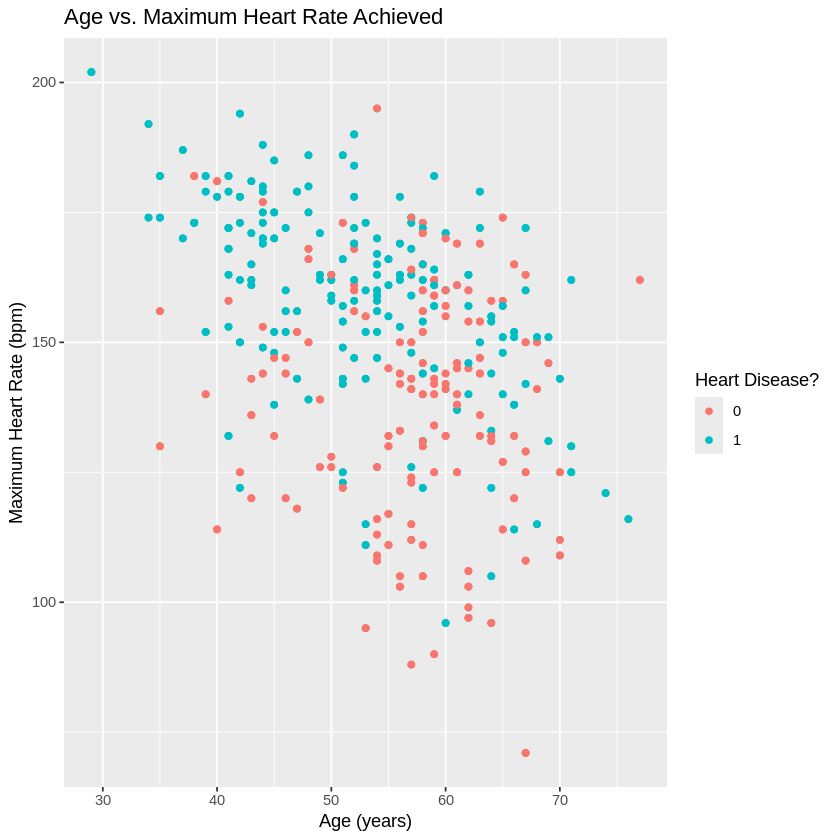

In [ ]:
scatterplot <- ggplot(df_heart, aes(x = age, y = thalach, color = factor(target))) +
  geom_point() +
  labs(
    title = "Age vs. Maximum Heart Rate Achieved",
    x = "Age (years)",
    y = "Maximum Heart Rate (bpm)",
    color = "Heart Disease?"
  )

scatterplot


Hmmm looks like there might be a weak negative relationship between the two variables. As age increases, the maximum heart rate tends to decrease. Additionally, based on the colors, we can observe that individuals without heart disease (red points) generally have a lower maximum heart rate compared to those with heart disease (blue points), who tend to cluster at higher heart rate values.



Now, let's examine the distribution of age. What is the most common age range in our dataset?


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


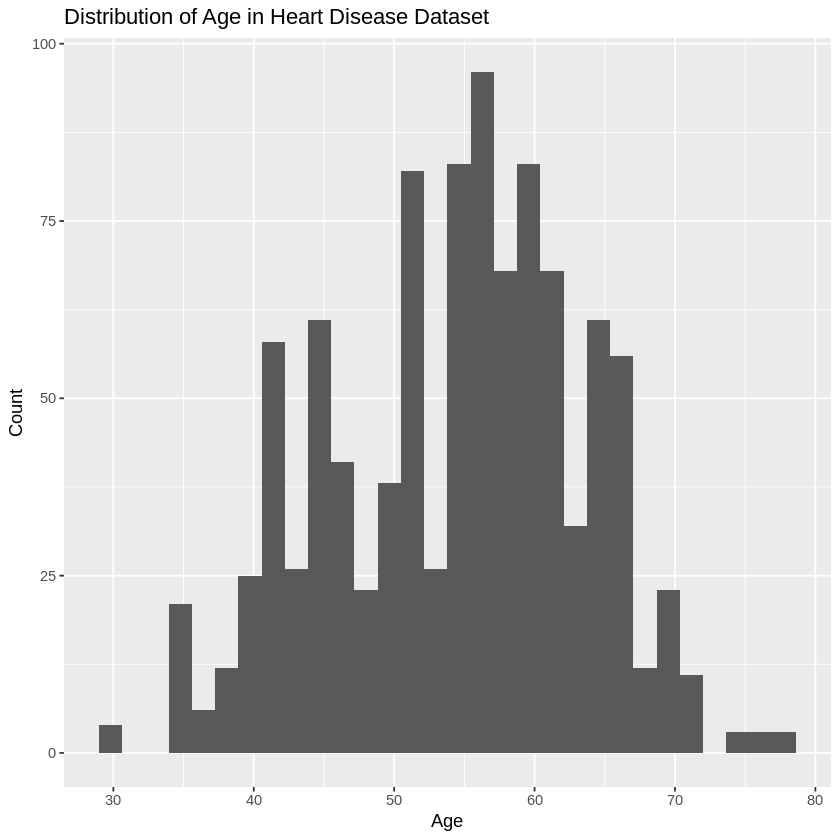

In [ ]:
histogram_age <- ggplot(df_heart, aes(x = age)) +
  geom_histogram() +
  labs(
    title = "Distribution of Age in Heart Disease Dataset",
    x = "Age",
    y = "Count"
  )

histogram_age

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


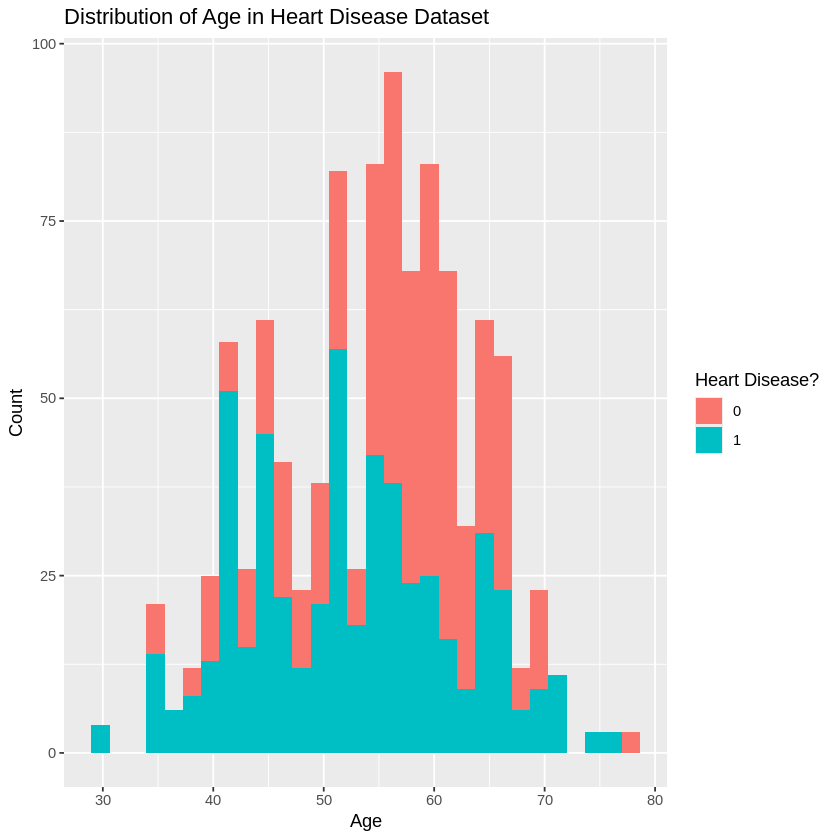

In [ ]:
histogram_age <- ggplot(df_heart, aes(x = age, fill = factor(target))) +
  geom_histogram() +
  labs(
    title = "Distribution of Age in Heart Disease Dataset",
    x = "Age",
    y = "Count",
    fill = "Heart Disease?"
  )

histogram_age

By plotting the data, we were able to see a pattern and the distribution of our data, that's what visualization is all about!  

## Your turn!

Question: What is the relationship between age and cholestrol? Make sure to color the plots by heart disease!

Use the starter code and fill in the *blanks*

In [ ]:
scatterplot_2 <- ggplot(___, aes(x = ___, y = ___, color = factor(___))) +
  geom___() +
  labs(___)

scatterplot_2


In [ ]:
# @title Scatterplot Solution

scatterplot_2 <- ggplot(df_heart, aes(x = age, y = chol, color = factor(target))) +
  geom_point() +
  labs(
    title = "Age vs. Cholestrol",
    x = "Age (years)",
    y = "Cholestrol (mg/dl)",
    color = "Heart Disease?"
  )

scatterplot_2


## **Part 5: Data Modelling**

Now, we want to use a common machine learning model, the Logistic Regression model, to predict whether someone has heart disease based on their age and maximum heart rate.

We first split our dataset into training data and testing data:

- Training data: Used to train the model.
- Testing data: Used to evaluate the model's performance.

In [ ]:
set.seed(123)  # For reproducibility

df_heart <- df_heart %>%
  mutate(target = factor(target))

# Split the data into training (80%) and testing (20%) sets
df_split <- initial_split(df_heart, prop = 0.8, strata = target)
train_data <- training(df_split)
test_data <- testing(df_split)

head(train_data)
dim(train_data)
dim(test_data)


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
55,1,0,160,289,0,0,145,1,0.8,1,1,3,0


[1] 819  14

[1] 206  14

Then, we define the variables for our predictions:

Predictor variables: `age` and `thalach`
Response variable: `target`

We use `age` and `thalach` to predict whether an individual has heart disease (`target`).

In [ ]:
model <- glm(target ~ age + thalach, data = train_data, family = binomial)
model


Call:  glm(formula = target ~ age + thalach, family = binomial, data = train_data)

Coefficients:
(Intercept)          age      thalach  
   -4.36376     -0.02824      0.03991  

Degrees of Freedom: 818 Total (i.e. Null);  816 Residual
Null Deviance:	    1135 
Residual Deviance: 971.6 	AIC: 977.6

Now that we have defined our  model and have it stored in the variable `model`, we are ready to generate predictions on the test data and evaluate its performance on unseen data.

In [ ]:
probabilities <- predict(model, test_data, type = "response")
predictions <- ifelse(probabilities > 0.5, 1, 0)
test_data_predictions <- test_data  %>% mutate(predictions = predictions)
head(test_data_predictions)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,predictions
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1
58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,0
34,0,1,118,210,0,1,192,0,0.7,2,0,2,1,1
58,1,2,140,211,1,0,165,0,0.0,2,0,2,1,1
61,0,0,145,307,0,0,146,1,1.0,1,0,3,0,0
44,1,2,130,233,0,1,179,1,0.4,2,0,2,1,1


In [ ]:
# Compute accuracy
accuracy <- mean(test_data_predictions$predictions == test_data_predictions$target)
print(paste("Model Accuracy:", round(accuracy * 100, 2), "%"))


[1] "Model Accuracy: 68.93 %"


Our Logistic Regression model has an accuracy of 68.9%. This means that 68.9% of the test data were correctly classified, indicating that the model doesn't perform really well in distinguishing between individuals with and without heart disease.

There are many ways to improve the accuracy of our model. A common method is to include more predictor variables.

In [ ]:
# The "." represents all variables in the train_data dataframe except for "target".
model_2 <- glm(target ~ ., data = train_data, family = binomial)
probabilities_2 <- predict(model_2, test_data, type = "response")
predictions_2 <- ifelse(probabilities > 0.5, 1, 0)
test_data_predictions_2 <- test_data  %>% mutate(predictions = predictions_2)
head(test_data_predictions_2)

# Compute accuracy
accuracy <- mean(test_data_predictions_2$predictions == test_data_predictions_2$target)
print(paste("Model Accuracy:", round(accuracy * 100, 2), "%"))


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,predictions
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0
58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,1
34,0,1,118,210,0,1,192,0,0.7,2,0,2,1,1
58,1,2,140,211,1,0,165,0,0.0,2,0,2,1,1
61,0,0,145,307,0,0,146,1,1.0,1,0,3,0,0
44,1,2,130,233,0,1,179,1,0.4,2,0,2,1,1


[1] "Model Accuracy: 84.95 %"


Looks like our model accuracy improved to 85%!

Let's visualize these predictions:

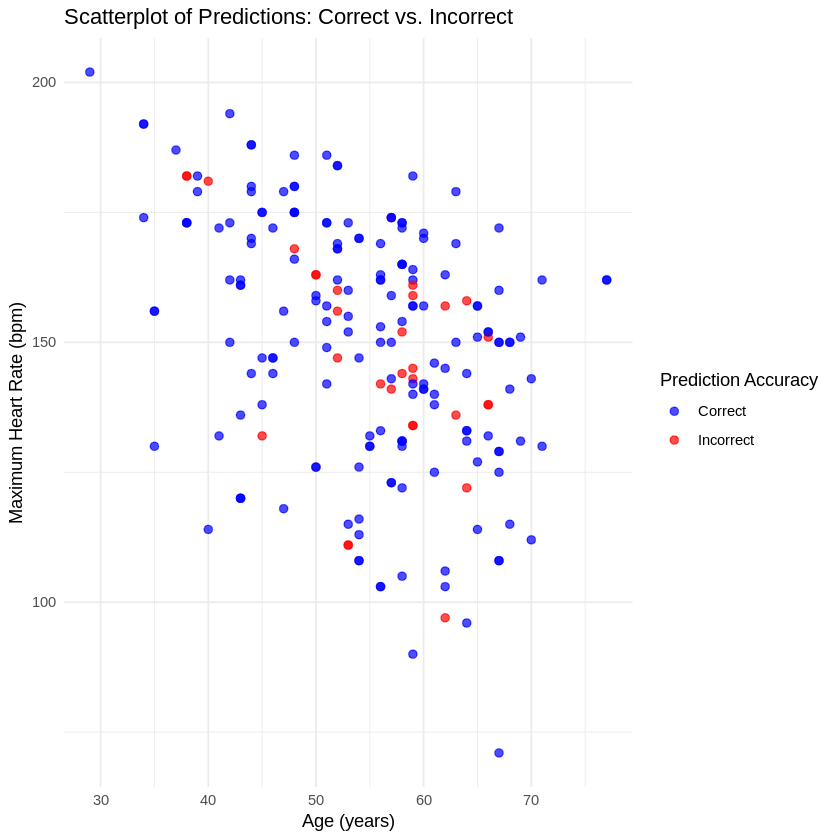

In [ ]:
# Create a new column to indicate correctness of predictions
test_data_predictions_2 <- test_data_predictions_2 %>%
  mutate(correctly_classified = ifelse(target == predictions, "Correct", "Incorrect"))

# Scatterplot: Age vs. Maximum Heart Rate (Colored by Correct/Incorrect Predictions)
ggplot(test_data_predictions_2, aes(x = age, y = thalach, color = correctly_classified)) +
  geom_point(alpha = 0.7, size = 2) +
  labs(
    title = "Scatterplot of Predictions: Correct vs. Incorrect",
    x = "Age (years)",
    y = "Maximum Heart Rate (bpm)",
    color = "Prediction Accuracy"
  ) +
  scale_color_manual(values = c("Correct" = "blue", "Incorrect" = "red")) +
  theme_minimal()


There are many advanced machine learning models and techniques that can further improve accuracy. What we covered today is one of the most fundamental approaches to building a machine learning model. As you continue learning, you can explore more sophisticated methods to enhance performance and gain deeper insights from your data!